#  Main Library

In [26]:
# Reading Data
import numpy as np
import cv2, os
import pandas as pd
import matplotlib.pyplot as plt

# Image Processing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.utils import to_categorical

# Building Model
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, BatchNormalization

# Reading Data

In [79]:

# Label Overview
classes = { 0:'Speed limit (20km/h)', 1:'Speed limit (30km/h)', 2:'Speed limit (50km/h)', 3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 5:'Speed limit (80km/h)', 6:'End of speed limit (80km/h)', 7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)',  9:'No passing', 10:'No passing veh over 3.5 tons', 11:'Right-of-way at intersection', 
            12:'Priority road', 13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [2]:
def Reading_data(traffic_path):
    traffic_folders = os.listdir(traffic_path)
    images = []
    labels = []
    num_classes = 43
    for folder in traffic_folders:
        images_folder = os.listdir(traffic_path + "\\" + folder)
        for image in images_folder:
            image = cv2.imread(traffic_path + "\\" + folder + "\\" + image)
            image = cv2.resize(image, (32, 32))
            
            images.append(image)
            labels.append(folder)
    print("--------- Done Loading Images --------------")
    return images, labels

In [3]:
traffic_path = r"D:\Courses language programming\9_Big Projects\12 - Traffic-sign recognition\data\Train"
X, Y = Reading_data(traffic_path)

X = np.array(X)
X = X.astype("float32") / 255.0

Y = np.array(Y)
labels = to_categorical(Y, 43)

--------- Done Loading Images --------------


In [4]:
labels[:5], X[0]

(array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

# Splitting Data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, labels, train_size=0.7, random_state=42)

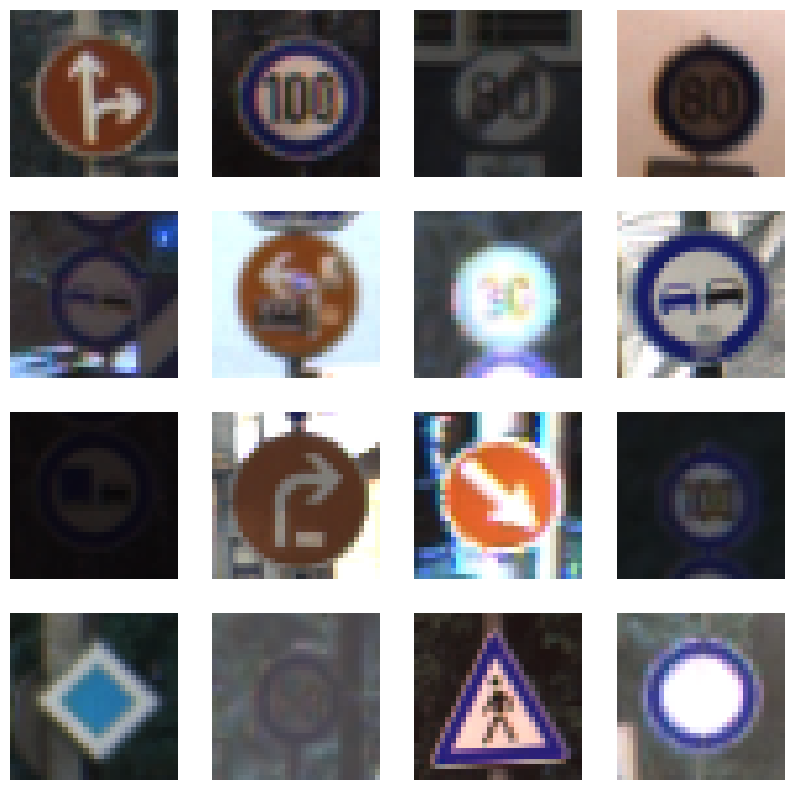

In [6]:
plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    plt.imshow(x_train[i])

# Building Model

In [7]:
model = k.models.Sequential([
    Conv2D(64, (5, 5),activation="relu", input_shape=(32, 32, 3), padding="same"),
    Conv2D(64, (5, 5), activation="relu", padding="same"),
    k.layers.MaxPool2D((2, 2)),
    Dropout(0.2),
    Conv2D(32, (5, 5), activation="relu", padding="same"),
    Conv2D(32, (5, 5), activation="relu", padding="same"),
    k.layers.MaxPool2D((2, 2)),
    Dropout(0.1),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(43, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        51232     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        25632     
                                                        

In [8]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
858/858 [==============================] - 17s 12ms/step - loss: 1.4878 - accuracy: 0.5789 - val_loss: 0.2518 - val_accuracy: 0.9182
Epoch 2/10
858/858 [==============================] - 9s 11ms/step - loss: 0.1610 - accuracy: 0.9512 - val_loss: 0.1198 - val_accuracy: 0.9642
Epoch 3/10
858/858 [==============================] - 9s 11ms/step - loss: 0.0806 - accuracy: 0.9755 - val_loss: 0.0783 - val_accuracy: 0.9793
Epoch 4/10
858/858 [==============================] - 10s 11ms/step - loss: 0.0584 - accuracy: 0.9817 - val_loss: 0.0726 - val_accuracy: 0.9791
Epoch 5/10
858/858 [==============================] - 10s 11ms/step - loss: 0.0480 - accuracy: 0.9848 - val_loss: 0.0331 - val_accuracy: 0.9932
Epoch 6/10
858/858 [==============================] - 10s 11ms/step - loss: 0.0491 - accuracy: 0.9856 - val_loss: 0.0686 - val_accuracy: 0.9788
Epoch 7/10
858/858 [==============================] - 10s 11ms/step - loss: 0.0365 - accuracy: 0.9891 - val_loss: 0.0593 - val_accuracy: 0

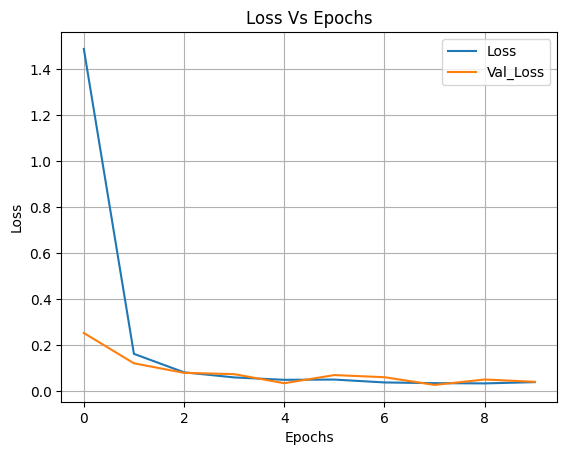

In [9]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

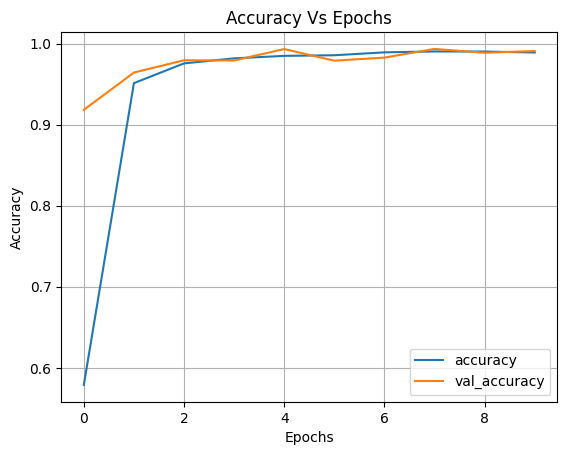

In [10]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

# Evaluation

In [11]:
loss, acc = model.evaluate(x_test, y_test)
print('Accuracy of Validation Data --> ', round(acc, 2) * 100)

368/368 [==============================] - 1s 4ms/step - loss: 0.0394 - accuracy: 0.9908
Accuracy of Validation Data -->  99.0


# Testing Data

In [16]:
def Reading_data(traffic_path):
    traffic_folders = os.listdir(traffic_path)
    images = []
    for image in traffic_folders:
        image = cv2.imread(traffic_path + "\\" + image)
        image = cv2.resize(image, (32, 32))

        images.append(image)
    print("--------- Done Loading Images --------------")
    return images

In [17]:
path_testing_images = r'D:\Courses language programming\9_Big Projects\12 - Traffic-sign recognition\data\Test'
testing_images = Reading_data(path_testing_images)
testing_images = np.array(testing_images)
testing_images = testing_images.astype("float32") / 255.0


len(testing_images), testing_images[0]

--------- Done Loading Images --------------


(12630,
 array([[[0.68235296, 0.54509807, 0.45490196],
         [0.67058825, 0.5372549 , 0.45490196],
         [0.6745098 , 0.5411765 , 0.4627451 ],
         ...,
         [0.56078434, 0.44705883, 0.38431373],
         [0.5764706 , 0.4745098 , 0.38039216],
         [0.50980395, 0.4117647 , 0.33333334]],
 
        [[0.6901961 , 0.5568628 , 0.4509804 ],
         [0.68235296, 0.54901963, 0.4509804 ],
         [0.6862745 , 0.5529412 , 0.45882353],
         ...,
         [0.6901961 , 0.56078434, 0.46666667],
         [0.6784314 , 0.5529412 , 0.47058824],
         [0.67058825, 0.54509807, 0.47058824]],
 
        [[0.68235296, 0.5529412 , 0.45882353],
         [0.6862745 , 0.5568628 , 0.45882353],
         [0.6745098 , 0.54901963, 0.44705883],
         ...,
         [0.7019608 , 0.5647059 , 0.47058824],
         [0.7019608 , 0.5647059 , 0.47843137],
         [0.69411767, 0.56078434, 0.47058824]],
 
        ...,
 
        [[0.654902  , 0.5372549 , 0.45882353],
         [0.6431373 , 0.5254902 ,

In [19]:
testing_labels = pd.read_csv(r'D:\Courses language programming\9_Big Projects\12 - Traffic-sign recognition\data\Test.csv')['ClassId'].values
testing_labels[:5]

array([16,  1, 38, 33, 11], dtype=int64)

# Prediction Testing Data

In [25]:
prediction = model.predict(testing_images)
prediction = [pred.argmax() for pred in prediction]
prediction[:4]

395/395 [==============================] - 1s 3ms/step


[16, 1, 38, 33]

In [29]:
print('Accuracy of Testing Data: ', round(accuracy_score(testing_labels, prediction), 4), '%')

Accuracy of Testing Data:  0.9534 %


# Building System Prediction

In [80]:
def predict_new_image(image_path):
    image = cv2.imread(image_path)
    new_image = cv2.resize(image, (32, 32))
    new_image = np.reshape(new_image, [1, 32, 32, 3])
    pred_image = model.predict(new_image)[0].argmax()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Prediction: {classes[pred_image]}')
    plt.show()
    return pred_image

1/1 [==============================] - 0s 18ms/step


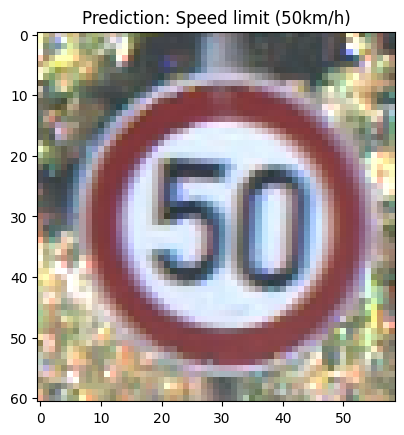

In [83]:
new_pred = predict_new_image(r'D:\Courses language programming\9_Big Projects\12 - Traffic-sign recognition\data\Test\00195.png')